In [1]:
import pandas as pd

df = pd.read_csv("dd_qiskit_0.05 - Sheet1.csv")
df.head()


,sequence,qubit_count,phase_damping_error,noisy_expectation_value,noisy_dd_expectation_value,noisy_execution_secs,noisy_dd_execution_secs,noisy_gate_depth,noisy_dd_gate_depth
0,XY4,3,0.05,1.577249,1.647805,0.0070,0.0045,7,23
1,XY4,3,0.05,1.577249,1.647805,0.0058,0.0041,7,23
2,XY4,3,0.05,1.577249,1.647805,0.0064,0.0050,7,23
3,XY4,4,0.05,1.403159,1.466031,0.0067,0.0047,8,28
4,XY4,4,0.05,1.403159,1.466031,0.0075,0.0046,8,28


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

In [4]:
grouped = df.groupby("qubit_count").mean(numeric_only=True).reset_index()


In [5]:
from scipy.stats import ttest_rel

# Paired t-test: Noisy vs Noisy + DD execution times
exec_ttest = ttest_rel(df["noisy_execution_secs"], df["noisy_dd_execution_secs"])

# Paired t-test: Noisy vs Noisy + DD expectation values
expect_ttest = ttest_rel(df["noisy_expectation_value"], df["noisy_dd_expectation_value"])

print("Execution Time:")
print(f"t-statistic: {exec_ttest.statistic:.3f}")
print(f"p-value: {exec_ttest.pvalue:.3f}")
if exec_ttest.pvalue < 0.05:
    print("Statistically significant difference in execution time.\n")
else:
    print("No statistically significant difference in execution time.\n")

print("Expectation Value:")
print(f"t-statistic: {expect_ttest.statistic:.2f}")
print(f"p-value: {expect_ttest.pvalue:.1e}")
if expect_ttest.pvalue < 0.05:
    print("DD improves expectation values significantly.")
else:
    print("No statistically significant difference in expectation values.\n")

print("Note: Expectation values are based on three Pauli observables (e.g., ZIZ, IZZ, etc.)")


Execution Time:
t-statistic: 0.656
p-value: 0.516
No statistically significant difference in execution time.

Expectation Value:
t-statistic: -101.83
p-value: 7.0e-45
DD improves expectation values significantly.
Note: Expectation values are based on three Pauli observables (e.g., ZIZ, IZZ, etc.)


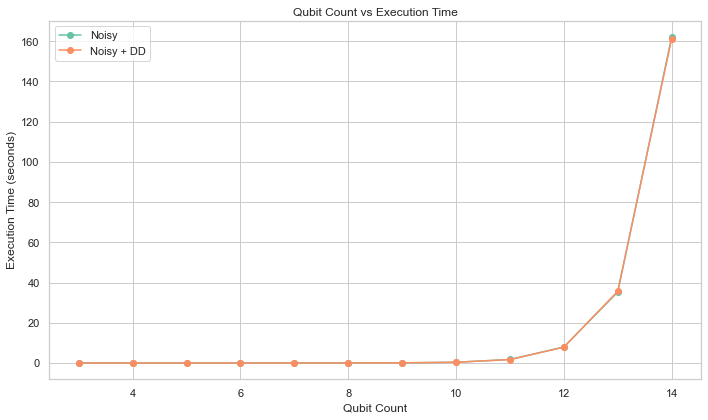

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(grouped["qubit_count"], grouped["noisy_execution_secs"], marker='o', label="Noisy", color=palette[0])
plt.plot(grouped["qubit_count"], grouped["noisy_dd_execution_secs"], marker='o', label="Noisy + DD", color=palette[1])
plt.title("Qubit Count vs Execution Time")
plt.xlabel("Qubit Count")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("qiskit_dd_exec_time.png", dpi=300)
plt.show()



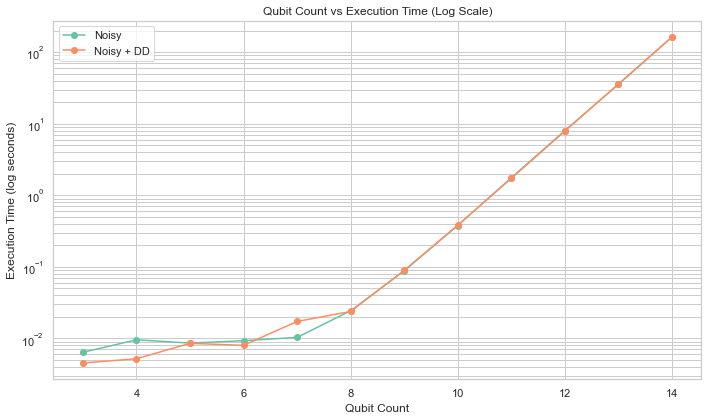

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(grouped["qubit_count"], grouped["noisy_execution_secs"], marker='o', label="Noisy", color=palette[0])
plt.plot(grouped["qubit_count"], grouped["noisy_dd_execution_secs"], marker='o', label="Noisy + DD", color=palette[1])
plt.yscale('log')
plt.title("Qubit Count vs Execution Time (Log Scale)")
plt.xlabel("Qubit Count")
plt.ylabel("Execution Time (log seconds)")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.savefig("qiskit_dd_exec_time_log.png", dpi=300)
plt.show()


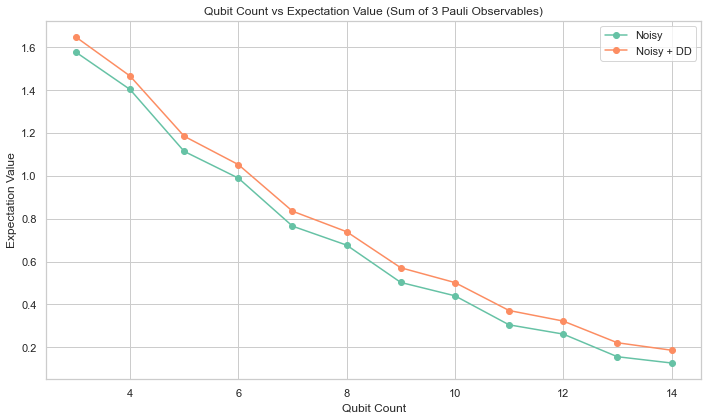

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(grouped["qubit_count"], grouped["noisy_expectation_value"], marker='o', label="Noisy", color=palette[0])
plt.plot(grouped["qubit_count"], grouped["noisy_dd_expectation_value"], marker='o', label="Noisy + DD", color=palette[1])
plt.title("Qubit Count vs Expectation Value (Sum of 3 Pauli Observables)")
plt.xlabel("Qubit Count")
plt.ylabel("Expectation Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("qiskit_dd_expectation_value.png", dpi=300)
plt.show()


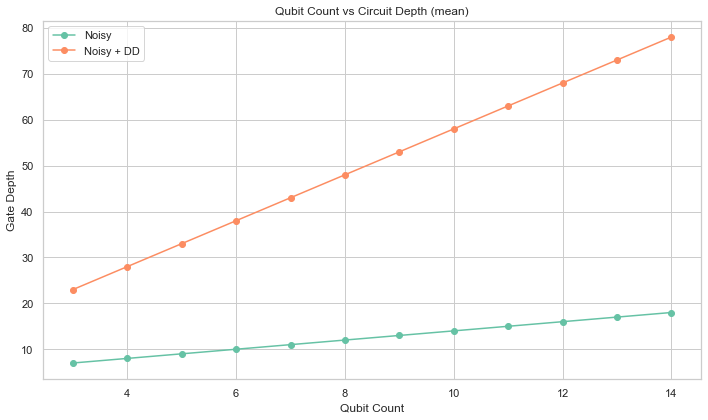

In [16]:
grouped_depth = df.groupby("qubit_count").mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_depth["qubit_count"], grouped_depth["noisy_gate_depth"], marker='o', label="Noisy", color=palette[0])
plt.plot(grouped_depth["qubit_count"], grouped_depth["noisy_dd_gate_depth"], marker='o', label="Noisy + DD", color=palette[1])
plt.title("Qubit Count vs Circuit Depth (mean)")
plt.xlabel("Qubit Count")
plt.ylabel("Gate Depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("qiskit_dd_gate_depth.png", dpi=300)
plt.show()


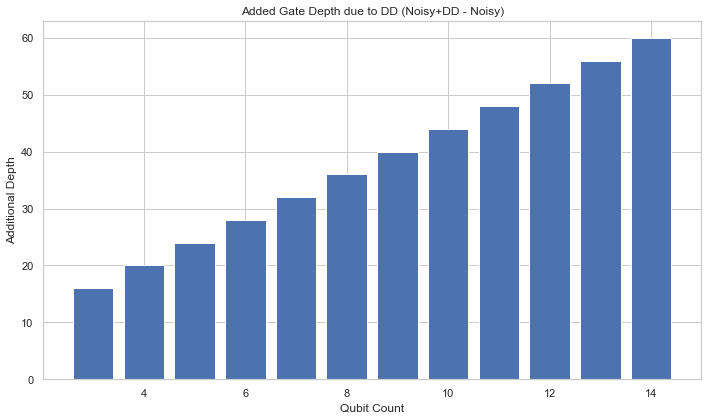

In [17]:
depth_diff = grouped_depth["noisy_dd_gate_depth"] - grouped_depth["noisy_gate_depth"]

plt.figure(figsize=(10, 6))
plt.bar(grouped_depth["qubit_count"], depth_diff)
plt.title("Added Gate Depth due to DD (Noisy+DD - Noisy)")
plt.xlabel("Qubit Count")
plt.ylabel("Additional Depth")
plt.grid(True)
plt.tight_layout()
plt.show()


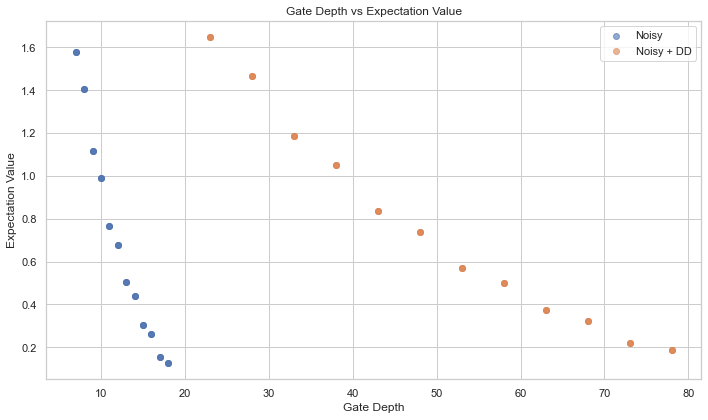

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df["noisy_gate_depth"], df["noisy_expectation_value"], alpha=0.6, label="Noisy")
plt.scatter(df["noisy_dd_gate_depth"], df["noisy_dd_expectation_value"], alpha=0.6, label="Noisy + DD")
plt.title("Gate Depth vs Expectation Value")
plt.xlabel("Gate Depth")
plt.ylabel("Expectation Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

df = pd.read_csv("dd_qiskit - DD-effect.csv")
df.head()


,sequence,qubit_count,phase_damping_error,noisy_expectation_value,noisy_dd_expectation_value,noisy_execution_secs,noisy_dd_execution_secs,noisy_gate_depth,noisy_dd_gate_depth
0,XY4,6,0.00,0.964724,0.964724,0.0106,0.0074,19,47
1,XY4,6,0.00,0.964724,0.964724,0.0086,0.0083,19,47
2,XY4,6,0.00,0.964724,0.964724,0.0078,0.0119,19,47
3,XY4,6,0.01,0.969704,0.983577,0.0078,0.0085,10,38
4,XY4,6,0.01,0.969704,0.983577,0.0145,0.0076,10,38


In [20]:
grouped = df.groupby("phase_damping_error").mean().reset_index()

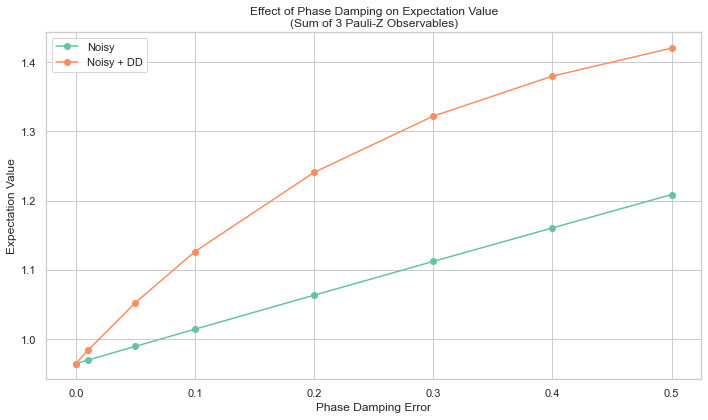

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped["phase_damping_error"], grouped["noisy_expectation_value"], marker='o', label="Noisy", color=palette[0])
plt.plot(grouped["phase_damping_error"], grouped["noisy_dd_expectation_value"], marker='o', label="Noisy + DD", color=palette[1])

plt.title("Effect of Phase Damping on Expectation Value\n(Sum of 3 Pauli-Z Observables)")
plt.xlabel("Phase Damping Error")
plt.ylabel("Expectation Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("qiskit_dd_vs_phase_damping.png", dpi=300)
plt.show()


In [5]:
grouped_time = df.groupby("phase_damping_error").mean().reset_index()


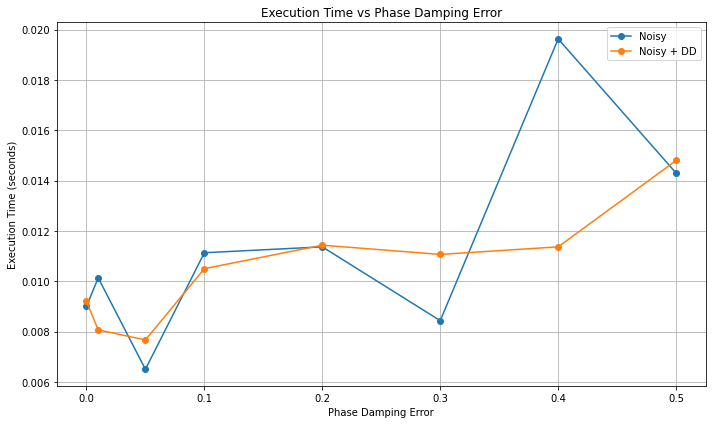

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_time["phase_damping_error"], grouped_time["noisy_execution_secs"], marker='o', label="Noisy")
plt.plot(grouped_time["phase_damping_error"], grouped_time["noisy_dd_execution_secs"], marker='o', label="Noisy + DD")

plt.title("Execution Time vs Phase Damping Error")
plt.xlabel("Phase Damping Error")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
